In [61]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import numpy as np

In [62]:
def __mkdir(*args):
    path = os.path.join(*args)
    try: 
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise
    return path

In [63]:

# Set working directory as the current directory of the ipython notebook
working_dir = os.getcwd()
data_dir = __mkdir(working_dir, "data")

In [64]:
medex = pd.read_pickle(os.path.join(data_dir, 'medex.pckl')) 
medex = medex.rename(columns={'NctId': 'nct_id'})
medex.head(10)

,nct_id,criteria_id,drug_name,brand_name,drug_form,strength,dose,route,frequency,duration,neccessity,cui,rxnorm_cui,rxnorm_cui_generic,generic_name,term
0,NCT00001205,8,corticosteroid,,,,,,,,,,354,354,corticosteroid,corticosteroid
1,NCT00001205,8,immunosuppressive,,,,,,,,,,5748,5748,immunosuppressive,immunosuppressive
2,NCT00001205,11,praziquantel,,,,,,,,,C0032911,8628,8628,praziquantel,praziquantel
3,NCT00001205,11,albendazole,,,,,,,,,C0001911,430,430,albendazole,albendazole
4,NCT00001205,11,methotrexate,,,,,,,,,C0025677,6851,6851,methotrexate,methotrexate
5,NCT00001205,11,corticosteroid,,,,,,,,,,354,354,corticosteroid,corticosteroid
6,NCT00001205,11,etanercept,,,,,,,,,C0717758,214555,214555,etanercept,etanercept
7,NCT00001205,14,anthelmintic,,,,,,,,,,868,868,anthelmintic,anthelmintic
8,NCT00001205,14,corticosteroid,,,,,,,,,,354,354,corticosteroid,corticosteroid
9,NCT00001205,14,immunosuppressive,,,,,,,,,,5748,5748,immunosuppressive,immunosuppressive


In [65]:
def get_terms_to_docs(mm):
    data = []
#     index = []
    #for name, group in mm.groupby('cui'):
    for name, group in mm.groupby('term'):
        g = group.drop_duplicates(subset='nct_id')
        nctids = list(set(g.nct_id.values))
        term = g.term.values[0]
        cui = list(set(g.cui.values))
        #stype = g.stype.values[0]
        d = {'cui': cui, 'term': term, 'nct_ids': nctids, 'num_docs': len(nctids)}
        data.append(d)
#         index.append(name)
#     df = pd.DataFrame(data, index=index).sort_values(by='num_docs', ascending=False)
    df = pd.DataFrame(data).sort(['num_docs'], ascending=False)
    return df

def get_docs_to_terms(mm, ctgov_data):
    data = []
#     index = []
    for name, group in mm.groupby('nct_id'):
        g = group.drop_duplicates(subset='cui')
        cuis = list(set(g.cui.values))
        terms = g.term.values
        title = ctgov_data[ctgov_data['id_info.nct_id'] == name].brief_title.values[0]
        url = 'https://clinicaltrials.gov/ct2/show/' + name
        d = {'cuis': cuis, 'terms': terms, 'nct_id': name, 'num_terms': len(cuis), 'title': title, 'url': url}
        data.append(d)
#         index.append(name)
#     df = pd.DataFrame(data, index=index).sort_values(by='num_docs', ascending=False)
    #df = pd.DataFrame(data).sort_values(by='num_terms', ascending=False)
    df = pd.DataFrame(data).sort(['num_terms'], ascending=False)
    return df

In [66]:
ctgov = pd.read_pickle(os.path.join(data_dir, 'ctgov.pckl'))
docs_to_terms = get_docs_to_terms(medex, ctgov)
docs_to_terms.to_pickle(os.path.join(data_dir, 'medex-trials.pckl'))
docs_to_terms.head(100)

,cuis,nct_id,num_terms,terms,title,url
43,"[C0699931, , C0699606, C0085170, C0699601, C07...",NCT00057460,24,"[cimetidine, cimetidine, vigabatrin, tiagabine...",Effect of Talampanel (an AMPA Receptor Blocker...,https://clinicaltrials.gov/ct2/show/NCT00057460
853,"[, C0002600, C0070166, C0530684, C0003299, C00...",NCT02535091,22,"[antiepileptic, phenobarbital, phenytoin, prim...",Safety and Pharmacokinetic Study of YKP3089 as...,https://clinicaltrials.gov/ct2/show/NCT02535091
225,"[, C0072980, C0025872, C0021747, C0008783, C00...",NCT00425113,19,"[isoniazid, rifampicin, ofloxacin, metronidazo...",Metronidazole for Pulmonary Tuberculosis (Sout...,https://clinicaltrials.gov/ct2/show/NCT00425113
398,"[, C0006949, C2757014, C0048044, C0220839, C03...",NCT00931619,18,"[antiepileptic, sodium, zonisamide, lamotrigin...",GABA/Glutamate Balance in Temporal Lobe Epilep...,https://clinicaltrials.gov/ct2/show/NCT00931619
214,"[C0006949, C0377265, C0080356, C0060926, C0068...",NCT00394927,14,"[topiramate, tiagabine, pregabalin, phenytoin,...",Adverse Event Scale in Patients With Epilepsy ...,https://clinicaltrials.gov/ct2/show/NCT00394927
231,"[C1701110, , C0024467, C1262867, C0001924, C08...",NCT00441142,14,"[gadolinium, vandetanib, zd6474, temozolomide,...",Zactima With Temodar During Radiation Treatmen...,https://clinicaltrials.gov/ct2/show/NCT00441142
749,"[, C0006949, C0042523, C0244656, C2936807, C02...",NCT02187809,13,"[clobazam, verapamil, stiripentol, felbamate, ...",Safety and Tolerability of Clobazam as Adjunct...,https://clinicaltrials.gov/ct2/show/NCT02187809
634,"[, C1588614, C0042523, C0022625, C0010592, C00...",NCT01764451,13,"[statin, amlodipine, dilitiazem, verapamil, am...",Permeability MRI in Cerebral Cavernous Malform...,https://clinicaltrials.gov/ct2/show/NCT01764451
613,"[, C0060135, C0035608, C0003299, C0033308, C03...",NCT01713777,13,"[lamotrigine, antiepileptic, over-the-counter ...",Equivalence Among Antiepileptic Drug Generic a...,https://clinicaltrials.gov/ct2/show/NCT01713777
747,"[, C0006949, C0042523, C0244656, C2936807, C02...",NCT02174094,13,"[antiepileptic, verapamil, stiripentol, felbam...",Clobazam as Adjunctive Therapy in Paediatric P...,https://clinicaltrials.gov/ct2/show/NCT02174094


In [67]:
terms_to_docs = get_terms_to_docs(medex)
terms_to_docs.to_pickle(os.path.join(data_dir, 'medex-terms.pckl'))
terms_to_docs.head(100)

,cui,nct_ids,num_docs,term
52,[C0003299],"[NCT00597285, NCT00152373, NCT00698581, NCT026...",194,antiepileptic
88,[],"[NCT00866775, NCT00152373, NCT00849212, NCT020...",120,benzodiazepine
265,"[C0060135, C0728742]","[NCT00866775, NCT02607904, NCT01338805, NCT011...",88,felbamate
382,"[, C0376261]","[NCT00416195, NCT00979004, NCT00956696, NCT001...",85,lactate
168,[],"[NCT00167245, NCT01335867, NCT00152503, NCT021...",74,contraceptive
367,[C1875327],"[NCT00790400, NCT00441896, NCT01648101, NCT021...",74,investigational drug
723,"[, C0048044]","[NCT01073579, NCT00441896, NCT00866775, NCT013...",73,vigabatrin
120,"[, C0006949, C0719149]","[NCT00542802, NCT00616759, NCT00021866, NCT022...",66,carbamazepine
388,"[C1827202, C0377265, null, C0876060]","[NCT02098941, NCT01801072, NCT00855738, NCT020...",64,levetiracetam
527,"[, C1123532, C0031507]","[NCT00167245, NCT00021866, NCT00869622, NCT012...",60,phenytoin


In [68]:
trials = pd.read_pickle(os.path.join(data_dir, 'medex-trials.pckl'))
trials.head()

,cuis,nct_id,num_terms,terms,title,url
43,"[C0699931, , C0699606, C0085170, C0699601, C07...",NCT00057460,24,"[cimetidine, cimetidine, vigabatrin, tiagabine...",Effect of Talampanel (an AMPA Receptor Blocker...,https://clinicaltrials.gov/ct2/show/NCT00057460
853,"[, C0002600, C0070166, C0530684, C0003299, C00...",NCT02535091,22,"[antiepileptic, phenobarbital, phenytoin, prim...",Safety and Pharmacokinetic Study of YKP3089 as...,https://clinicaltrials.gov/ct2/show/NCT02535091
225,"[, C0072980, C0025872, C0021747, C0008783, C00...",NCT00425113,19,"[isoniazid, rifampicin, ofloxacin, metronidazo...",Metronidazole for Pulmonary Tuberculosis (Sout...,https://clinicaltrials.gov/ct2/show/NCT00425113
398,"[, C0006949, C2757014, C0048044, C0220839, C03...",NCT00931619,18,"[antiepileptic, sodium, zonisamide, lamotrigin...",GABA/Glutamate Balance in Temporal Lobe Epilep...,https://clinicaltrials.gov/ct2/show/NCT00931619
214,"[C0006949, C0377265, C0080356, C0060926, C0068...",NCT00394927,14,"[topiramate, tiagabine, pregabalin, phenytoin,...",Adverse Event Scale in Patients With Epilepsy ...,https://clinicaltrials.gov/ct2/show/NCT00394927


In [69]:
terms = pd.read_pickle(os.path.join(data_dir, 'medex-terms.pckl'))

top_terms = terms.sort('num_docs', ascending=False).head(100)
top_terms = top_terms.set_index('term')
top_terms

,cui,nct_ids,num_docs
term,,,
antiepileptic,[C0003299],"[NCT00597285, NCT00152373, NCT00698581, NCT026...",194
benzodiazepine,[],"[NCT00866775, NCT00152373, NCT00849212, NCT020...",120
felbamate,"[C0060135, C0728742]","[NCT00866775, NCT02607904, NCT01338805, NCT011...",88
lactate,"[, C0376261]","[NCT00416195, NCT00979004, NCT00956696, NCT001...",85
contraceptive,[],"[NCT00167245, NCT01335867, NCT00152503, NCT021...",74
investigational drug,[C1875327],"[NCT00790400, NCT00441896, NCT01648101, NCT021...",74
vigabatrin,"[, C0048044]","[NCT01073579, NCT00441896, NCT00866775, NCT013...",73
carbamazepine,"[, C0006949, C0719149]","[NCT00542802, NCT00616759, NCT00021866, NCT022...",66
levetiracetam,"[C1827202, C0377265, null, C0876060]","[NCT02098941, NCT01801072, NCT00855738, NCT020...",64


<class 'pandas.core.series.Series'>


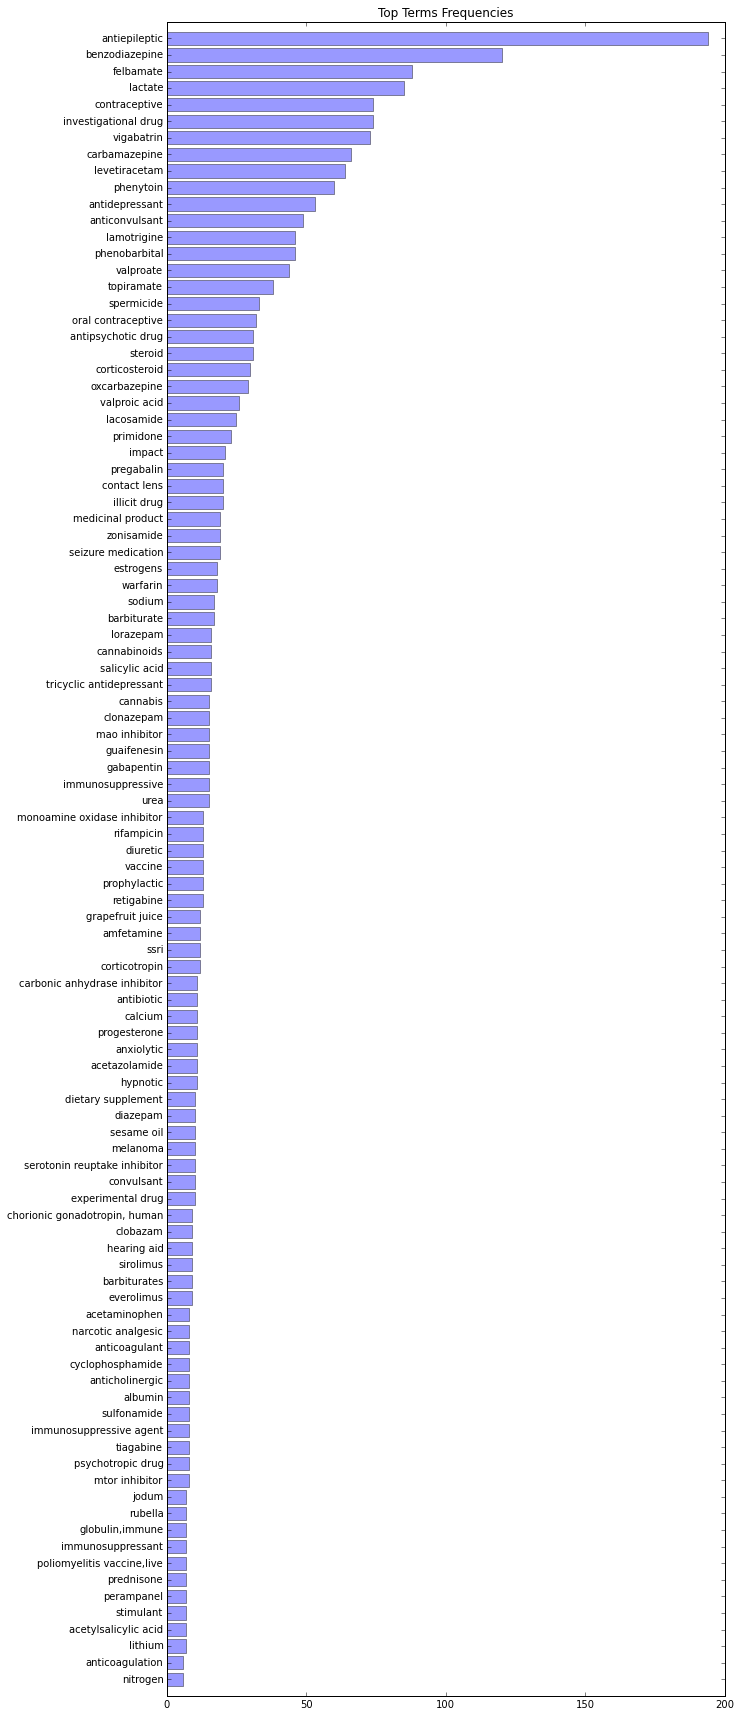

In [70]:

rcParams['figure.figsize'] = 10, 30 # control plot size
top_terms = terms.sort('num_docs', ascending=False).head(100)
print type(top_terms.num_docs)
#top_terms.sort_values(by='num_docs').num_docs.plot.barh(fontsize=12)
#top_terms.sort('num_docs').num_docs.plot.barh(fontsize=12)
y_pos = np.arange(100)[::-1]
plt.barh(y_pos, list(top_terms.num_docs), align='center', alpha=0.4)
plt.yticks(y_pos, list(top_terms.term))
plt.ylim(-1, 100)
plt.title('Top Terms Frequencies')

# get_terms(N, k,m) and get_freqs realization

In [71]:
from operator import itemgetter

def get_freqs(terms, docs, perc=False):
    _docs = ('|'.join(doc) for doc in docs)
    cv = CountVectorizer(vocabulary=terms, analyzer=lambda doc: doc.split('|'))
    m = vect.transform(_docs)
    terms_freq = sorted([(term, round(float(freq)/len(docs), 2) if perc else freq) for term, freq in zip(terms, m.getnnz(0))], key=itemgetter(1), reverse=True)
    return terms_freq

def filter_terms(terms, curr_terms):
    _terms = list(set(terms) - set(curr_terms))
    return _terms

def filter_docs(docs, curr_terms, m):
    _docs = [doc for doc in docs if len(set(doc).intersection(set(curr_terms))) < m]
    return _docs

def get_terms(terms, docs, n=40, k=10, m=5):
    """
        (n, k, m) realization, which takes terms and docs and returns n terms with freqs
    """
    curr_terms_freq = []
    print len(docs), len(terms)
    while len(curr_terms_freq) < n:
        terms_freq = get_freqs(terms, docs, perc=False)
        curr_terms_freq += terms_freq[:k]
        curr_terms = [t[0] for t in curr_terms_freq]
        terms = filter_terms(terms, curr_terms)
        docs = filter_docs(docs, curr_terms, m)
        print len(docs), len(terms)
        print
    return curr_terms_freq[:n]
    

In [73]:
voc = terms.term.values.tolist()
docs = [list(trial['terms']) for trial in trials[['terms']].to_dict('records')]

In [74]:
trs = get_terms(voc, docs, n=40, k=5, m=2)
print trs

882 739


NameError: global name 'vect' is not defined